In [1]:
import numpy as np
import pandas as pd
import os
import sys

from IPython.display import display
from scipy.stats import pearsonr
from scipy.cluster import hierarchy as hac

from random import randint
from scipy.stats import halfnorm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
object_arr = np.arange(0,763)
num_obj = len(object_arr)

fac = 10.

In [3]:
''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''

corr_matrix_cc = np.loadtxt('xobject_corr_matrix_cc.dat')
corr_diff_matrix_cc = np.loadtxt('xobject_corr_diff_matrix_cc.dat')
# dist_matrix_cc = np.loadtxt('xobject_dist_matrix_cc.dat')
# dist_tr_matrix_cc = np.loadtxt('xobject_dist_tr_matrix_cc.dat')

corr_matrix_cc_med = np.loadtxt('xobject_corr_matrix_cc_med.dat')
corr_diff_matrix_cc_med = np.loadtxt('xobject_corr_diff_matrix_cc_med.dat')
# dist_matrix_cc_med = np.loadtxt('xobject_dist_matrix_cc.dat')
# dist_tr_matrix_cc_med = np.loadtxt('xobject_dist_tr_matrix_cc.dat')

''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''
corr_matrix_acg = np.loadtxt('xobject_corr_matrix_acg.dat')
corr_diff_matrix_acg = np.loadtxt('xobject_corr_diff_matrix_acg.dat')
# dist_matrix_acg = np.loadtxt('xobject_dist_matrix_acg.dat')
# dist_tr_matrix_acg = np.loadtxt('xobject_dist_tr_matrix_acg.dat')

''' LOAD FROM FILES IF NOT CALCULATED BEFORE '''
corr_matrix_aco = np.loadtxt('xobject_corr_matrix_aco.dat')
corr_diff_matrix_aco = np.loadtxt('xobject_corr_diff_matrix_aco.dat')
# dist_matrix_aco = np.loadtxt('xobject_dist_matrix_aco.dat')
# dist_tr_matrix_aco = np.loadtxt('xobject_dist_tr_matrix_aco.dat')

In [4]:
''' create linkage vector for CC'''
obj_analyze = np.loadtxt('objects_to_analyze_reduced.dat').astype(np.int)
num_analyze = len(obj_analyze)

# dist_corr_matrix = np.zeros(corr_matrix_cc.shape)
# dist_corr_diff_matrix = np.zeros(corr_matrix_cc.shape)

# dist_corr_matrix.fill(np.nan)
# dist_corr_diff_matrix.fill(np.nan)
# for ii in range(0,corr_matrix_cc.shape[0]):
# 	dist_corr_matrix[ii] = 1- corr_matrix_cc[ii]/corr_matrix_cc[ii,ii]
# 	dist_corr_diff_matrix[ii] = 1- corr_diff_matrix_cc[ii]/corr_diff_matrix_cc[ii,ii]

dist_corr_matrix = 1 - corr_matrix_cc
dist_corr_diff_matrix = 1 - corr_diff_matrix_cc
dist_corr_tr_matrix = np.arctan(fac) - np.arctan(fac*corr_matrix_cc)

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

dist_corr_matrix_med = 1 - corr_matrix_cc_med
dist_corr_diff_matrix_med = 1 - corr_diff_matrix_cc_med
dist_corr_tr_matrix_med = np.arctan(fac) - np.arctan(fac*corr_matrix_cc_med)

c_corr_matrix_med = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix_med = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix_med = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
				c_corr_tr_matrix[index] = dist_corr_tr_matrix[ii,jj]
				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
# 				c_dist_matrix[index] = dist_matrix_cc[ii,jj]
# 				c_dist_tr_matrix[index] = dist_tr_matrix_cc[ii,jj]
				
				c_corr_matrix_med[index] = dist_corr_matrix_med[ii,jj]
				c_corr_tr_matrix_med[index] = dist_corr_tr_matrix_med[ii,jj]
				c_corr_diff_matrix_med[index] = dist_corr_diff_matrix_med[ii,jj]
	
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_tr_matrix/= np.std(c_corr_tr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)
# c_dist_matrix/= np.std(c_dist_matrix)
# c_dist_tr_matrix/= np.std(c_dist_tr_matrix)

# c_corr_matrix_med/= np.std(c_corr_matrix_med)
# c_corr_tr_matrix_med/= np.std(c_corr_tr_matrix_med)
# c_corr_diff_matrix_med/= np.std(c_corr_diff_matrix_med)

c_corr_matrix_cc = c_corr_matrix
c_corr_tr_matrix_cc = c_corr_tr_matrix
c_corr_diff_matrix_cc = c_corr_diff_matrix
# c_dist_matrix_cc = c_dist_matrix
# c_dist_tr_matrix_cc = c_dist_tr_matrix

c_corr_matrix_cc_med = c_corr_matrix_med
c_corr_tr_matrix_cc_med = c_corr_tr_matrix_med
c_corr_diff_matrix_cc_med = c_corr_diff_matrix_med

In [5]:
''' create linkage vector for ACG'''
# obj_analyze = np.loadtxt('objects_to_analyze.dat')
# num_analyze = len(obj_analyze)

# dist_corr_matrix = np.zeros(corr_matrix_acg.shape)
# dist_corr_diff_matrix = np.zeros(corr_matrix_acg.shape)

# dist_corr_matrix.fill(np.nan)
# dist_corr_diff_matrix.fill(np.nan)
# for ii in range(0,corr_matrix_acg.shape[0]):
# 	dist_corr_matrix[ii] = 1- corr_matrix_acg[ii]/corr_matrix_acg[ii,ii]
# 	dist_corr_diff_matrix[ii] = 1- corr_diff_matrix_acg[ii]/corr_diff_matrix_acg[ii,ii]

dist_corr_matrix = 1 - corr_matrix_acg
dist_corr_diff_matrix = 1 - corr_diff_matrix_acg
dist_corr_tr_matrix = np.arctan(fac) - np.arctan(fac*corr_matrix_acg)

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
				c_corr_tr_matrix[index] = dist_corr_tr_matrix[ii,jj]
				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
# 				c_dist_matrix[index] = dist_matrix_acg[ii,jj]
# 				c_dist_tr_matrix[index] = dist_tr_matrix_acg[ii,jj]
				
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_tr_matrix/= np.std(c_corr_tr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)
# c_dist_matrix/= np.std(c_dist_matrix)
# c_dist_tr_matrix/= np.std(c_dist_tr_matrix)

c_corr_matrix_acg = c_corr_matrix
c_corr_tr_matrix_acg = c_corr_tr_matrix
c_corr_diff_matrix_acg = c_corr_diff_matrix
# c_dist_matrix_acg = c_dist_matrix
# c_dist_tr_matrix_acg = c_dist_tr_matrix

In [6]:
''' create linkage vector for ACO'''
# obj_analyze = np.loadtxt('objects_to_analyze.dat')
# num_analyze = len(obj_analyze)

# dist_corr_matrix = np.zeros(corr_matrix_aco.shape)
# dist_corr_diff_matrix = np.zeros(corr_matrix_aco.shape)

# dist_corr_matrix.fill(np.nan)
# dist_corr_diff_matrix.fill(np.nan)
# for ii in range(0,corr_matrix_aco.shape[0]):
# 	dist_corr_matrix[ii] = 1- corr_matrix_aco[ii]/corr_matrix_aco[ii,ii]
# 	dist_corr_diff_matrix[ii] = 1- corr_diff_matrix_aco[ii]/corr_diff_matrix_aco[ii,ii]

dist_corr_matrix = 1 - corr_matrix_aco
dist_corr_diff_matrix = 1 - corr_diff_matrix_aco
dist_corr_tr_matrix = np.arctan(fac) - np.arctan(fac*corr_matrix_aco)

c_corr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
c_corr_diff_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))
# c_dist_tr_matrix = np.zeros(int(num_analyze*(num_analyze-1)/2))

index = 0
for ii in range(0,num_obj):
	if np.any(obj_analyze == ii):
		for jj in range(ii+1,num_obj):
			if np.any(obj_analyze == jj):
				c_corr_matrix[index] = dist_corr_matrix[ii,jj]
				c_corr_tr_matrix[index] = dist_corr_tr_matrix[ii,jj]
				c_corr_diff_matrix[index] = dist_corr_diff_matrix[ii,jj]
# 				c_dist_matrix[index] = dist_matrix_aco[ii,jj]
# 				c_dist_tr_matrix[index] = dist_tr_matrix_aco[ii,jj]
				
				index+= 1 

'''normalize things'''
# c_corr_matrix/= np.std(c_corr_matrix)
# c_corr_tr_matrix/= np.std(c_corr_tr_matrix)
# c_corr_diff_matrix/= np.std(c_corr_diff_matrix)
# c_dist_matrix/= np.std(c_dist_matrix)
# c_dist_tr_matrix/= np.std(c_dist_tr_matrix)

c_corr_matrix_aco = c_corr_matrix
c_corr_tr_matrix_aco = c_corr_tr_matrix
c_corr_diff_matrix_aco = c_corr_diff_matrix
# c_dist_matrix_aco = c_dist_matrix
# c_dist_tr_matrix_aco = c_dist_tr_matrix

In [7]:
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 6}

matplotlib.rc('font', **font)

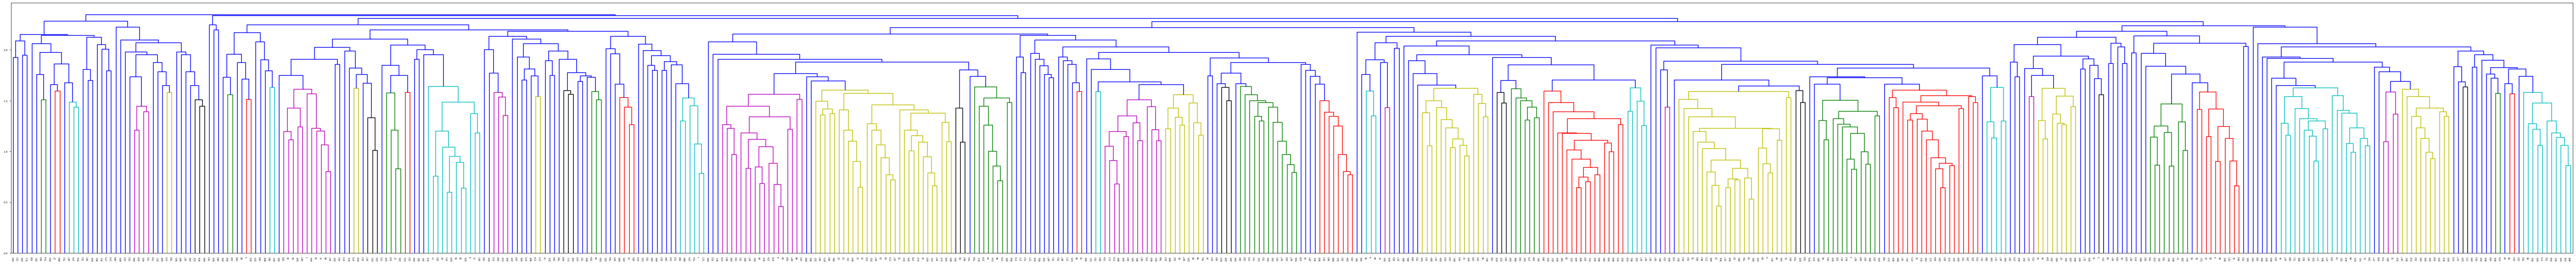

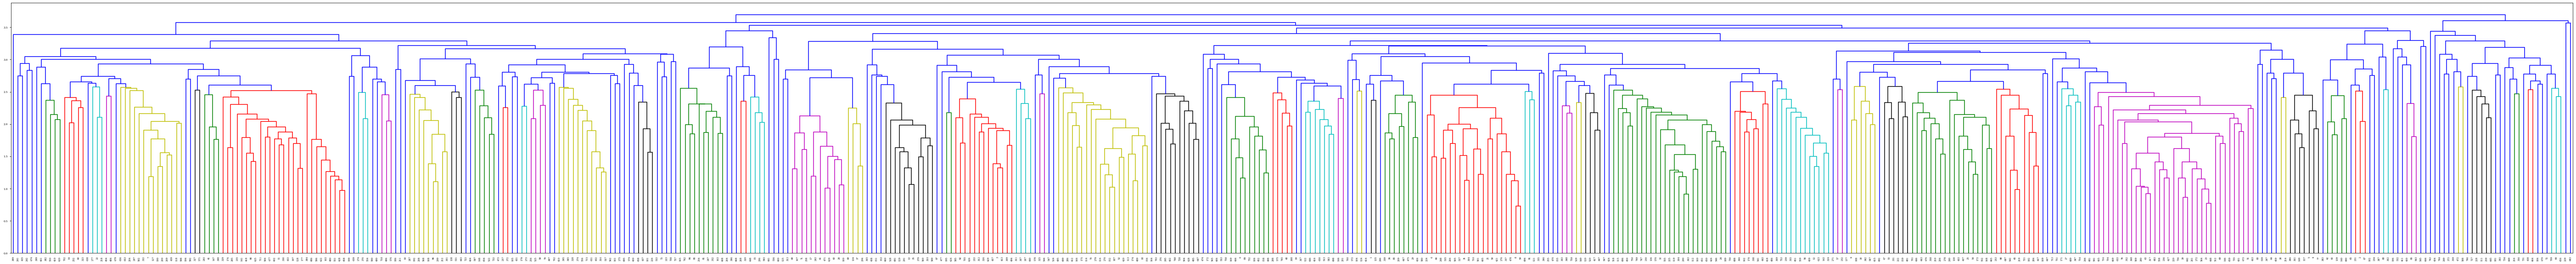

In [8]:
''' PLOT dist combine '''
METHOD = 'weighted'

c_matrix_total_cc = 2*c_corr_matrix_cc #+ 2*c_corr_diff_matrix_cc
c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)
fig = plt.figure(figsize=(100,10))
dn = hac.dendrogram(links, labels=obj_analyze)

plt.savefig('plot_hac_corr_cc+acg+aco_L2'+METHOD+'_v2.pdf', dpi=400)


c_matrix_total = (c_matrix_total_cc + c_matrix_total_acg + c_matrix_total_aco)
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)
fig = plt.figure(figsize=(100,10))
dn = hac.dendrogram(links, labels=obj_analyze)

plt.savefig('plot_hac_corr_cc+acg+aco_L1'+METHOD+'_v2.pdf', dpi=400)



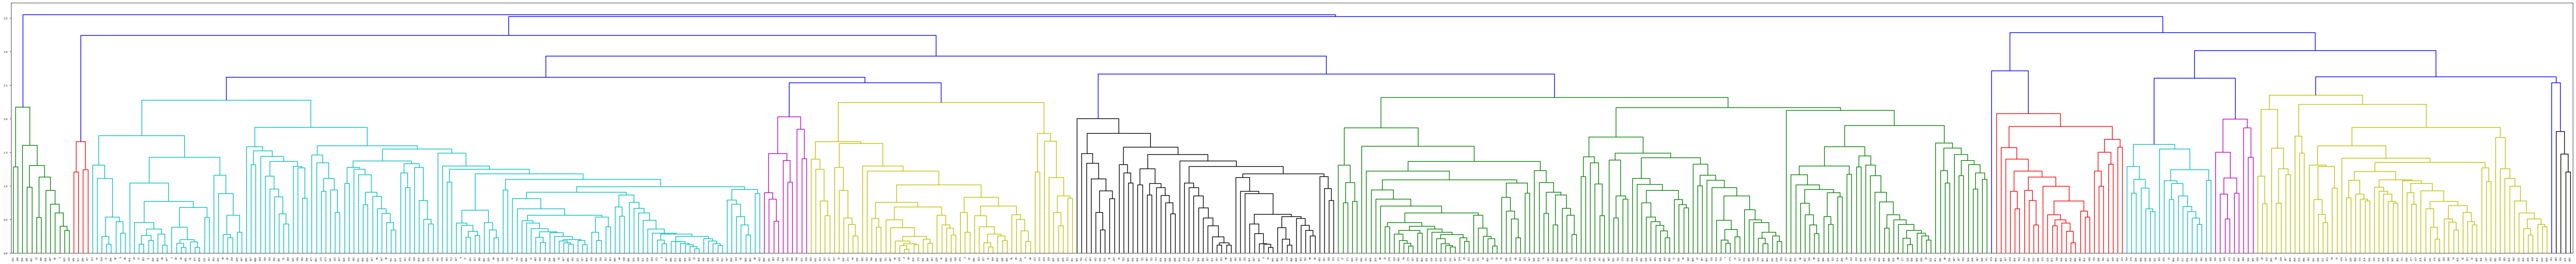

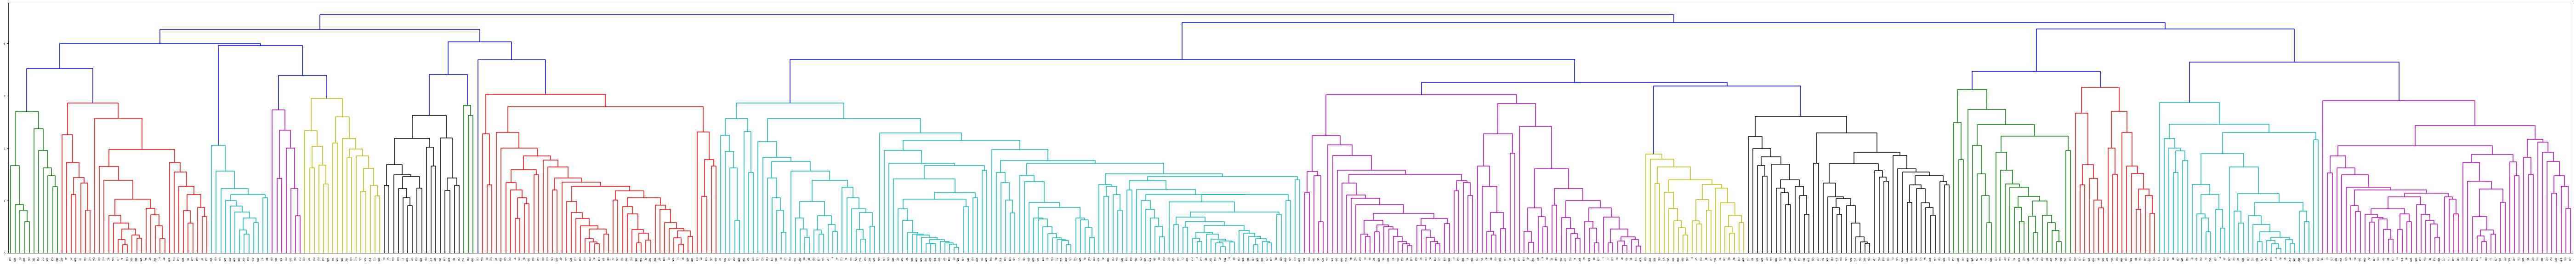

In [9]:
''' PLOT dist combine '''
c_matrix_total_cc = 2.*c_corr_tr_matrix_cc #+ c_dist_tr_matrix_cc
c_matrix_total_acg = c_corr_tr_matrix_acg #+ c_dist_tr_matrix_acg
c_matrix_total_aco = c_corr_tr_matrix_aco #+ c_dist_tr_matrix_aco

c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)
fig = plt.figure(figsize=(100,10))
dn = hac.dendrogram(links, labels=obj_analyze)

plt.savefig('plot_hac_corrtr_cc+acg+aco_L2'+METHOD+'_v2.pdf', dpi=400)


c_matrix_total = c_matrix_total_cc + c_matrix_total_acg + c_matrix_total_aco
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)
fig = plt.figure(figsize=(100,10))
dn = hac.dendrogram(links, labels=obj_analyze)

plt.savefig('plot_hac_corrtr_cc+acg+aco_L1'+METHOD+'_v2.pdf', dpi=400)



In [10]:
# ''' EXTRACT CLUSTERS '''

# c_matrix_total_cc = 2.*c_corr_tr_matrix_cc #+ c_dist_tr_matrix_cc
# c_matrix_total_acg = c_corr_tr_matrix_acg #+ c_dist_tr_matrix_acg
# c_matrix_total_aco = c_corr_tr_matrix_aco #+ c_dist_tr_matrix_aco

# c_matrix_total = c_matrix_total_cc + c_matrix_total_acg + c_matrix_total_aco
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)

# fc = hac.fcluster(links, t=14., criterion='distance')

# print(fc.max())
# print(fc)
# num_clusters = fc.max()
# outfile = 'hac_corrtr_cc+acg+aco_L1'+METHOD+'_'+str(num_clusters)+'clusters_v2.dat'
# np.savetxt(outfile, fc, fmt='%d')

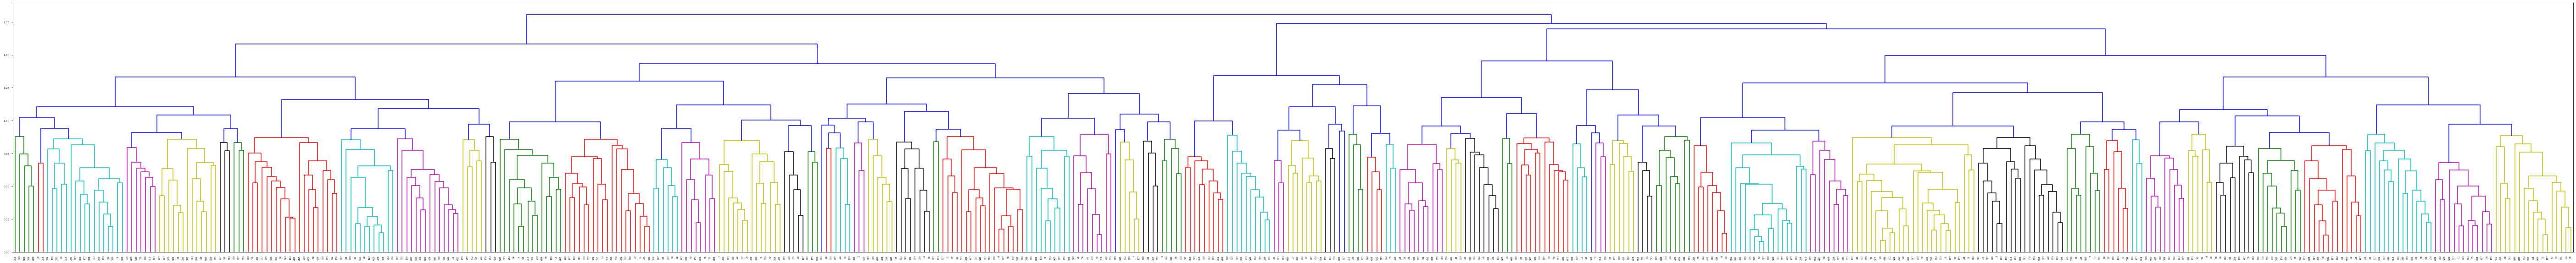

In [11]:
''' PLOT dist combine '''
METHOD = 'complete'

c_matrix_total_cc = c_corr_matrix_cc #+ 2*c_corr_diff_matrix_cc
# c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)
fig = plt.figure(figsize=(100,10))
dn = hac.dendrogram(links, labels=obj_analyze, color_threshold=0.9)

plt.savefig('plot_hac_corr_cc_'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total_cc = c_corr_tr_matrix_cc #+ 2*c_corr_diff_matrix_cc
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# # c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corrtr_cc_'+METHOD+'_v2.pdf', dpi=400)


In [12]:
''' EXTRACT CLUSTERS '''
METHOD = 'complete'

c_matrix_total_cc = c_corr_matrix_cc#*2. #+ c_dist_tr_matrix_cc
c_matrix_total_acg = c_corr_matrix_acg #+ c_dist_tr_matrix_acg
c_matrix_total_aco = c_corr_matrix_aco #+ c_dist_tr_matrix_aco

# c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)

fc = hac.fcluster(links, t=0.73, criterion='distance')

print(fc.max())
print(fc)
num_clusters = fc.max()
cluster_arr = np.arange(1,num_clusters+1)
num_in_cluster = np.zeros(num_clusters).astype(np.int)
for ii in range(0,num_clusters):
	num_in_cluster[ii] = np.sum(fc == cluster_arr[ii])

print(num_in_cluster)
ordered_num_in_cluster = np.argsort(num_in_cluster)
print(num_in_cluster[ordered_num_in_cluster[-10:]])
big_clusters = cluster_arr[ordered_num_in_cluster[-10:]]
big_clusters = big_clusters[::-1]
print(big_clusters)

fc_out = np.zeros(len(fc)).astype(np.int) -1
for ii in range(0,10):
	fc_out[fc == big_clusters[ii]] = ii
print(fc_out)

num_clusters=10
outfile = 'hac_corr_cc_'+METHOD+'_'+str(num_clusters)+'clusters_v10.dat'
# np.savetxt(outfile, fc_out, fmt='%d')

181
[133  46  58 145 151  84  64  78  69 162 112  40 176 179  39 128  46  49
 118  74   5 141  40 176  92  46  49 165  72 141  43 179 154   4 168  44
 169  93 130  74  55 108 162  74 142 179 179 176  20  47 139  69 118 149
 135  55 153  64 179  46 141  36  47  68 123 151 133 102  53 166 133  43
 177  68  85  24  44  22 164 164 174 153  35  46  74  31  24  82  43 104
  49 174 171 120  27 168  36 145  35   7 141   9  44 114 104 149  78 169
  11  36 154 146  27 165  55 141  24  20 106 141 169 120 141 163  35 160
  65 174 141 104  20  40 172  22 159 170 164 108 179 104  22  94  95 176
 166 108   5   7  72  91  68 125  99 179 143  12   7  87  25 160 111  39
  14   7 106   6  35 136  43  35 100  87   4 122   5  74 141  40  50  44
 141 139  60 121 141  31 138  22  64  39 135  22 174   8 131  46 134 166
  86 159  69  71  39  35 164   3 149  30  47  60 141 159  81 139   1   7
 174 150 141  73  33  76  74  16  35 166 135  69   5 118 165 105 141  11
  24 154 130   7  88  88  63 141 176  85 147 17

In [13]:
new_objects_to_analyze = obj_analyze[fc_out>-1]
print(new_objects_to_analyze)
# np.savetxt('objects_to_analyze_reduced_'+METHOD+'_v10.dat', new_objects_to_analyze, fmt='%d')

[  8  12  13  14  23  25  32  35  52  53  54  56  59  63  67  69  90 103
 112 118 119 136 140 141 143 146 149 157 159 168 173 177 187 190 197 200
 220 225 230 235 236 248 252 261 269 272 280 284 290 293 297 304 307 310
 317 324 329 331 333 337 338 342 355 363 368 386 398 401 407 409 418 424
 426 427 428 433 439 448 451 457 458 467 478 481 483 495 506 509 512 528
 535 541 542 546 550 551 552 555 557 558 559 560 564 570 589 591 598 622
 623 624 625 631 633 650 651 676 677 691 697 711 718 721 735 736 747 753]


In [14]:
''' EXTRACT CLUSTERS '''
METHOD = 'complete'

c_matrix_total_cc = c_corr_matrix_cc#*2. #+ c_dist_tr_matrix_cc
c_matrix_total_acg = c_corr_matrix_acg #+ c_dist_tr_matrix_acg
c_matrix_total_aco = c_corr_matrix_aco #+ c_dist_tr_matrix_aco

# c_matrix_total = np.sqrt(c_matrix_total_cc**2 + c_matrix_total_acg**2 + c_matrix_total_aco**2)
c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
links = hac.linkage(c_matrix_total, method=METHOD)

fc = hac.fcluster(links, t=0.2, criterion='distance')

print('Number of clusters: '+str(fc.max()))
# print(fc)
num_clusters = fc.max()
cluster_arr = np.arange(1,num_clusters+1)
num_in_cluster = np.zeros(num_clusters).astype(np.int)
for ii in range(0,num_clusters):
	num_in_cluster[ii] = np.sum(fc == cluster_arr[ii])

print('Number in each cluster: '+str(num_in_cluster))
print('Number of clusters with >1 blazars: '+str(np.sum(num_in_cluster>1)))
ordered_num_in_cluster = np.argsort(num_in_cluster)
print(num_in_cluster[ordered_num_in_cluster[-20:]])
big_clusters = cluster_arr[ordered_num_in_cluster[-20:]]
big_clusters = big_clusters[::-1]
print(big_clusters)

fc_out = np.zeros(len(fc)).astype(np.int) -1
for ii in range(0,20):
	fc_out[fc == big_clusters[ii]] = ii
print(fc_out)

num_clusters=20
outfile = 'hac_corr_cc_'+METHOD+'_'+str(num_clusters)+'clusters_vHC.dat'
# np.savetxt(outfile, fc_out, fmt='%d')

Number of clusters: 525
Number in each cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1

In [15]:
new_objects_to_analyze = obj_analyze[fc_out>-1]
print(new_objects_to_analyze)
# np.savetxt('objects_to_analyze_reduced_'+METHOD+'_vHC.dat', new_objects_to_analyze, fmt='%d')

[  0   8  12  13  23  35  39  45  52  59  63  69  84  90 103 116 119 152
 160 174 187 190 200 219 261 272 280 290 317 337 363 368 428 448 457 458
 478 480 489 509 564 623 642 736]


In [16]:
# ''' PLOT dist combine '''
# METHOD = 'complete'

# c_matrix_total_cc = c_corr_matrix_cc_med + c_corr_diff_matrix_cc_med
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corr_cc+diff_med_'+METHOD+'_v2.pdf', dpi=400)


# c_matrix_total_cc = c_corr_tr_matrix_cc_med + c_corr_diff_matrix_cc_med
# # c_matrix_total_acg = c_corr_matrix_acg #+ c_corr_diff_matrix_acg
# # c_matrix_total_aco = c_corr_matrix_aco #+ c_corr_diff_matrix_aco

# c_matrix_total = c_matrix_total_cc
# c_matrix_total-= np.amin(c_matrix_total) - 0.01
# links = hac.linkage(c_matrix_total, method=METHOD)
# fig = plt.figure(figsize=(100,10))
# dn = hac.dendrogram(links, labels=obj_analyze)

# plt.savefig('plot_hac_corrtr_cc+diff_med_'+METHOD+'_v2.pdf', dpi=400)


In [17]:
# print(c_corr_diff_matrix_cc_med)